In [18]:
import sys
 
# setting path
sys.path.append('../')

from utils.dataloaders import MIDIEvalDataLoader
from utils.display import display_dicom

from pathlib import Path

In [19]:
root_data_dir = '/home/r079a/Desktop/de-identification/dataset'

loader = MIDIEvalDataLoader(
    rawimagespath=Path(root_data_dir, 'images/manifest-1617826555824'),
    deidimagespath=Path(root_data_dir, 'images-2/manifest-1617826161202'),
    uidsmappath=Path(root_data_dir, 'Pseudo-PHI-DICOM-Dataset-uid_crosswalk.csv'),
)

In [20]:
(rawdcm, metadata), (deiddcm, _) = loader.get_raw_n_deid_patient(3, include_metadata=True)

{'Series UID': '2.25.45367868844278747809947145409050295798', 'Collection': 'Pseudo-PHI-DICOM-Data', '3rd Party Analysis': 'NO', 'Data Description URI': 'https://doi.org/10.7937/s17zr072', 'Subject ID': 3209648408, 'Study UID': '2.25.186760260011452398476108131496539831798', 'Study Description': 'CT UROGRAM', 'Study Date': '09-23-1999', 'Series Description': 'PARENCHYMAL PHASE Sep1999', 'Manufacturer': 'GE MEDICAL SYSTEMS', 'Modality': 'CT', 'SOP Class Name': 'CT Image Storage', 'SOP Class UID': '1.2.840.10008.5.1.4.1.1.2', 'Number of Images': 152, 'File Size': '80.10 MB', 'File Location': './Pseudo-PHI-DICOM-Data/3209648408/09-23-1999-NA-CT UROGRAM-31798/3.000000-PARENCHYMAL PHASE Sep1999-95798', 'Download Timestamp': '2024-06-03T18:20:55.924'}


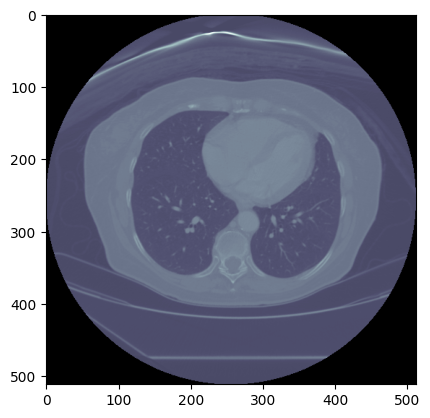

In [21]:
display_dicom(rawdcm[0])

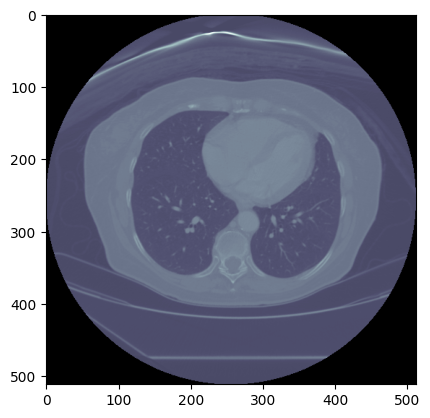

In [22]:
display_dicom(deiddcm[0])

In [23]:
# for element in rawdcm[0]:
#     if element.VR == 'OW' or element.VR == 'UI':
#         continue
        
#     thisval = element.value
#     deidval = ''
#     if element.tag in deiddcm[0]:
#         deidval = deiddcm[0][element.tag].value

#     if deidval != thisval:
#         print(element.tag, element.name, element.VR)
#         print(f"{thisval} --> {deidval}")

In [24]:
from dicomanonymizer.anonymizer import anonymize
from pathlib import Path
import os

In [25]:
rootdir = '/home/r079a/Desktop/de-identification/'

raw_img_path = Path(rootdir, 'dataset/images/manifest-1617826555824', metadata['File Location'])
output_path = Path(rootdir, 'dicom-output')

In [26]:
first_dcm_name = os.listdir(raw_img_path)[0]
first_dcm_name

'1-001.dcm'

In [27]:
anonymize(
    Path(raw_img_path, first_dcm_name), output_path, {}, True,
)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29.62it/s]


In [28]:
from pydicom import dcmread
import pandas as pd

In [29]:
with open(Path(output_path, first_dcm_name), 'rb') as infile:
    ds = dcmread(infile)

In [30]:
tagvalues = []
for element in rawdcm[0]:
    if element.VR == 'OW':
        continue
    deidval = "Not available"
    if element.tag in deiddcm[0]:
        deidval = str(deiddcm[0][element.tag].value)
    dcmannonval = "Not available"
    if element.tag in ds:
        dcmannonval = str(ds[element.tag].value)
    changed = False
    if str(element.value) != deidval or str(element.value) != dcmannonval:
        changed = True
    values_tuple = (str(element.tag), element.name, str(element.value), deidval, dcmannonval, changed)
    tagvalues.append(values_tuple)

In [31]:
valus_df = pd.DataFrame(tagvalues, columns =['Tag', 'Name', 'Raw Metadata', 'Ground Truth Anonimization', 'Dicom Anonymizer', 'Changed'])

In [32]:
pd.set_option('display.max_rows', 82)
valus_df[valus_df['Changed']]

,Tag,Name,Raw Metadata,Ground Truth Anonimization,Dicom Anonymizer,Changed
2,"(0008, 0012)",Instance Creation Date,19990923,19890905,00010101,True
3,"(0008, 0013)",Instance Creation Time,104542,104542,000000.00,True
5,"(0008, 0018)",SOP Instance UID,2.25.37474298480622017016850343221557575158,1.3.6.1.4.1.14519.5.2.1.8700.9668.257030622180...,2.25.11292342573322180676336204762186951058,True
6,"(0008, 0020)",Study Date,19990923,19890905,00010101,True
7,"(0008, 0021)",Series Date,19990923,19890905,00010101,True
8,"(0008, 0022)",Acquisition Date,19990923,19890905,00010101,True
9,"(0008, 0023)",Content Date,19990923,19890905,00010101,True
10,"(0008, 0030)",Study Time,103848,103848,000000.00,True
11,"(0008, 0031)",Series Time,104354,104354,000000.00,True
12,"(0008, 0032)",Acquisition Time,104540,104540,000000.00,True


In [16]:
targettag = (0x0018,0xa001)
print(rawdcm[0][targettag].value)
print(deiddcm[0][targettag].value)
print(ds[targettag].value)

[(0008, 0070) Manufacturer                        LO: 'SECTRA'
(0018, a002) Contribution DateTime               DT: '20120224142721'
(0040, a170)  Purpose of Reference Code Sequence  1 item(s) ---- 
   (0008, 0100) Code Value                          SH: '109103'
   (0008, 0102) Coding Scheme Designator            SH: 'DCM'
   (0008, 0104) Code Meaning                        LO: 'Modifying Equipment'
   ---------]
[(0008, 0070) Manufacturer                        LO: 'SECTRA'
(0018, a002) Contribution DateTime               DT: '20030626'
(0040, a170)  Purpose of Reference Code Sequence  1 item(s) ---- 
   (0008, 0100) Code Value                          SH: '109103'
   (0008, 0102) Coding Scheme Designator            SH: 'DCM'
   (0008, 0104) Code Meaning                        LO: 'Modifying Equipment'
   ---------]
[(0008, 0070) Manufacturer                        LO: 'SECTRA'
(0018, a002) Contribution DateTime               DT: '20120224142721'
(0040, a170)  Purpose of Reference Co